**All Rights Reserved**

**Copyright (c) 2025 IRT Saint-Exupery**

*Author & contact:* 
* mouhcine.mendil@irt-saintexupery.com 

# Natural Language Processing (NLP) to Large Language Models (LLM)

<div align="center">
    <h2>Lab Session 1: Part I</h2>
</div>

By now, you may have encountered various data structures such as tables, images, and time series. But have you ever wondered how computers can understand human language? This is where Natural Language Processing (NLP) comes in: it is one of the most popular fields in AI today. Thanks to recent developments in foundation models that rely on transformer architectures, NLP capabilities have has seen revolutionary advancements. In this tutorial, you will get an introduction to this exciting field that combines computer science, linguistics, and machine learning. We will explore the world of text data and provide you with the skills necessary to process them and create models that can unlock knowledge and extract valuable insights.

## 0. Setup

<div class="alert alert-block alert-warning">

There are many special characters for text formatting that control rendering like line jumps, symbols, etc. 

⚠️ Use <code>print</code> for raw text output and the function <code>printmd</code> (defined below) to have a beautiful markdown rendering when needed.

</div>


**NLP tools requirements:**

* Natural Language Toolkit (NLTK) is one of the leading platforms for building Python programs to work with human language data.

* Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora. Target audience is NLP and information retrieval (IR) community.


In [1]:
# Run this cell to install requirements
# %pip install --user --upgrade nltk pandas gensim seaborn scikit-learn textblob regex tqdm
# scipy>=1.8.0

In [2]:
from IPython.display import Markdown, display
from copy import deepcopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from tqdm import tqdm

nltk.download("stopwords")
nltk.download("averaged_perceptron_tagger")
nltk.download("punkt")

from nltk.corpus import stopwords


def printmd(string):
    display(Markdown(string))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mouhcine.mendil\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mouhcine.mendil\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mouhcine.mendil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


# 1. Sentiment Analysis of IMDb Movie Reviews

One of the most common applications of NLP is text classification. Therefore, you will kickoff this notebook by addressing the task of **sentiment analysis**. The aim is understanding the positive or negative sentiment/opinion expressed in text. 

## 1.1 IMDb Dataset 

IMDb dataset contains 50,000 movie reviews in English, each labelled as positive or negative. You'll find it under `data` folder (downloaded from [Kaggle](https://www.kaggle.com/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews)).

<div class='alert alert-info'>

<b> Exercise 1.1 </b>

- Load the dataset in a dataframe. Note the feature column (review) and target column (sentiment).
- How many samples are there ?
- Plot the target distribution. Is the dataset balanced ?
- Transform the target values to binary (i.e "positive" -> 1 & "negative" -> 0). Use [`np.where`](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

</div>

The number of samples is: 50000


### Distribution of sentiments

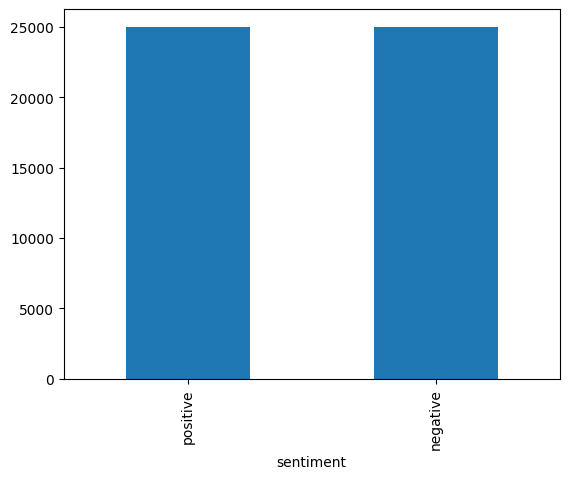

Both classes are represented equally 😄. Note that if it is not the case, suitable evaluation metrics need to be used.

In [3]:
## Download the dataset in the data folder and load it using pandas
df_raw = pd.read_csv("../data/IMDB Dataset.csv")

## Print the number of samples
print(f"The number of samples is: {df_raw.shape[0]}")

# plot the distribution of sentiments
printmd("### Distribution of sentiments")
df_raw["sentiment"].value_counts().plot(kind="bar")
plt.show()
printmd(
    "Both classes are represented equally 😄. Note that if it is not the case, suitable evaluation metrics need to be used."
)

In [4]:
df_raw["sentiment"] = np.where(df_raw["sentiment"] == "positive", 1, 0)

In [5]:
df_raw["sentiment"].value_counts()

sentiment
1    25000
0    25000
Name: count, dtype: int64

In [6]:
assert set(df_raw["sentiment"]) == set(
    {0, 1}
), "You still have non-binarized values, try again"

## 1.2 Data cleaning

Textual data require special handling in the pre-processing phase. 


<div class='alert alert-info'>

<b> Exercise 1.2.1.1 </b>

- Take a look on the first two reviews using <code>print</code> and <code>printmd</code>. What do you notice ?
</div>

In [7]:
# First review
printmd("### First review")
print(df_raw["review"][0])
printmd(df_raw["review"][0])

# Second review
printmd("-------")
printmd("### Second review")
print(df_raw["review"][1])
printmd(df_raw["review"][1])

### First review

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.

-------

### Second review

A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.


A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master's of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional 'dream' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell's murals decorating every surface) are terribly well done.

In [1]:
!pip list

Package                      Version   Editable project location
---------------------------- --------- -------------------------------------------------
absl-py                      2.1.0
aiofiles                     23.2.1
aiohappyeyeballs             2.4.3
aiohttp                      3.10.8
aiohttp-retry                2.8.3
aiosignal                    1.3.1
altair                       5.4.1
amqp                         5.2.0
annotated-types              0.7.0
antlr4-python3-runtime       4.9.3
anyio                        4.6.0
appdirs                      1.4.4
asttokens                    2.4.1
astunparse                   1.6.3
async-timeout                4.0.3
asyncssh                     2.15.0
atpublic                     5.0
attrs                        23.1.0
billiard                     4.2.1
black                        24.4.2
Bottleneck                   1.3.6
celery                       5.4.0
certifi                      2022.12.7
cffi                         1.17.

<div class="alert alert-info">

<h4><b>Intermediary Exercises</b></h4>

Strings in Python are sequences of characters, which allows us to manipulate and process them in various ways. Let's explore:

<ol>
  <li>
    <b>Extract characters:</b> 
    Print the list of <strong>characters</strong> that form the first review.
  </li>
  <li>
    <b>Extract words:</b> 
    If we want to extract words instead of characters, we can use the 
    <a href="https://docs.python.org/3/library/stdtypes.html#str.split" target="_blank"><code>split</code></a> 
    method. By specifying a suitable separator (e.g., a space for English and French), we can break the string into words.
    <ul>
      <li>Print the list of <strong>words</strong> forming the first review.</li>
    </ul>
  </li>
  <li>
    <b>Rebuild the original Review:</b> 
    Concatenate the extracted list of words back into the original sentence using the 
    <a href="https://docs.python.org/3/library/stdtypes.html#str.join" target="_blank"><code>join</code></a> 
    method. Use a space to interleave each word.
  </li>
</ol>

</div>

In [8]:
# Print the characters of the first review
char_list = []
for char in df_raw["review"][0]:
    char_list.append(char)

printmd("### Characters of the first review")
print(char_list)

# Print the words of the first review
first_review_words = df_raw["review"][0].split(sep=" ")
printmd("### Words of the first review")
print(first_review_words)

# Rebuild the first review from the list of words
first_review_rebuilt = " ".join(first_review_words)
printmd("### Rebuilt first review")
print(first_review_rebuilt)

assert (
    first_review_rebuilt == df_raw["review"][0]
), "The review is not correctly rebuilt"

### Characters of the first review

['O', 'n', 'e', ' ', 'o', 'f', ' ', 't', 'h', 'e', ' ', 'o', 't', 'h', 'e', 'r', ' ', 'r', 'e', 'v', 'i', 'e', 'w', 'e', 'r', 's', ' ', 'h', 'a', 's', ' ', 'm', 'e', 'n', 't', 'i', 'o', 'n', 'e', 'd', ' ', 't', 'h', 'a', 't', ' ', 'a', 'f', 't', 'e', 'r', ' ', 'w', 'a', 't', 'c', 'h', 'i', 'n', 'g', ' ', 'j', 'u', 's', 't', ' ', '1', ' ', 'O', 'z', ' ', 'e', 'p', 'i', 's', 'o', 'd', 'e', ' ', 'y', 'o', 'u', "'", 'l', 'l', ' ', 'b', 'e', ' ', 'h', 'o', 'o', 'k', 'e', 'd', '.', ' ', 'T', 'h', 'e', 'y', ' ', 'a', 'r', 'e', ' ', 'r', 'i', 'g', 'h', 't', ',', ' ', 'a', 's', ' ', 't', 'h', 'i', 's', ' ', 'i', 's', ' ', 'e', 'x', 'a', 'c', 't', 'l', 'y', ' ', 'w', 'h', 'a', 't', ' ', 'h', 'a', 'p', 'p', 'e', 'n', 'e', 'd', ' ', 'w', 'i', 't', 'h', ' ', 'm', 'e', '.', '<', 'b', 'r', ' ', '/', '>', '<', 'b', 'r', ' ', '/', '>', 'T', 'h', 'e', ' ', 'f', 'i', 'r', 's', 't', ' ', 't', 'h', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 's', 't', 'r', 'u', 'c', 'k', ' ', 'm', 'e', ' ', 'a', 'b', 'o',

### Words of the first review

['One', 'of', 'the', 'other', 'reviewers', 'has', 'mentioned', 'that', 'after', 'watching', 'just', '1', 'Oz', 'episode', "you'll", 'be', 'hooked.', 'They', 'are', 'right,', 'as', 'this', 'is', 'exactly', 'what', 'happened', 'with', 'me.<br', '/><br', '/>The', 'first', 'thing', 'that', 'struck', 'me', 'about', 'Oz', 'was', 'its', 'brutality', 'and', 'unflinching', 'scenes', 'of', 'violence,', 'which', 'set', 'in', 'right', 'from', 'the', 'word', 'GO.', 'Trust', 'me,', 'this', 'is', 'not', 'a', 'show', 'for', 'the', 'faint', 'hearted', 'or', 'timid.', 'This', 'show', 'pulls', 'no', 'punches', 'with', 'regards', 'to', 'drugs,', 'sex', 'or', 'violence.', 'Its', 'is', 'hardcore,', 'in', 'the', 'classic', 'use', 'of', 'the', 'word.<br', '/><br', '/>It', 'is', 'called', 'OZ', 'as', 'that', 'is', 'the', 'nickname', 'given', 'to', 'the', 'Oswald', 'Maximum', 'Security', 'State', 'Penitentary.', 'It', 'focuses', 'mainly', 'on', 'Emerald', 'City,', 'an', 'experimental', 'section', 'of', 'the', '

### Rebuilt first review

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fac

<div class='alert alert-info'>

<b> Exercise 1.2.1.2 </b>

- Text data usually contains artifacts only relevent for visualization (e.g., HTML tags and special characters) and undesired content such as spelling mistakes. Such elements are not only useless for modeling but can also be harmful as they pollute the relevant information. For each of the following data cleaning operations, write a function to apply them on the IMDB dataset:    
    1. Lowering all capital letters.
    2. Using the [regex](https://docs.python.org/3/library/re.html) Python library (`re.sub`), substitute (by a space) the patterns associated to Hyperlinks ("https:something" or "http:something"), Mentions ("@something") and HTML elements ("\<something>" or "\</something>").
    3. Stop words, i.e commonly occurring words in a language that are considered to have minimal meaning on their own.
        * Using <code>stopwords.words</code>, list all stopwords in english. 
        * Delete stopwords from IMDB movie reviews (you can use [`str.replace`](https://docs.python.org/3/library/stdtypes.html#str.replace))
    4. Replace with space any special characters, that is anything other than alpha-numerical characters, such as punctuation and symbols (you can use [isalnum](https://docs.python.org/3/library/stdtypes.html#str.isalnum)).
</div>

In [ ]:
def lower_case(text):
    # Lowercase text
    lowered_text = text.lower()
    return lowered_text


def remove_patterns(text):
    # replace hyperlinks, mentions and html elements
    patterns = "https?:\\S+|http?:\\S+|@\\S+|<[^<]+?>"
    replacement_text = " "
    cleaned_text = re.sub(pattern=patterns, repl=replacement_text, string=text)
    return cleaned_text


printmd("### English stop words")
english_stop_words = stopwords.words("english")
print(f"There are {len(english_stop_words)} stop words in english: \n")
print(english_stop_words)


def clean_stop_words(text):
    english_stop_words = stopwords.words("english")
    kept_words_list = []
    for word in text.split():
        if word not in english_stop_words:
            kept_words_list.append(word)
    # return the text without the stop words
    return " ".join(kept_words_list)


def clean_non_alphanum(text):
    # Remove non alphanumeric characters
    clean_characters_list = []
    for char in text:
        if not char.isalnum():
            clean_characters_list.append(" ")
        else:
            clean_characters_list.append(char)
    return "".join(clean_characters_list)

### English stop words

There are 179 stop words in english: 

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not',

<div class='alert alert-info'>

<b> Exercise 1.2.1.3 </b>
- Apply the previous operations on a copy of the raw dataframe and compare the first review before and after cleaning. Use [`apply`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.apply.html) to sequentially apply preprocessing functions (⚠️ **order is important**). 
</div>

In [10]:
# Init cleaned dataframe, we keep the copy of raw dataframe untouched
df_clean = deepcopy(df_raw)

# Apply operations
list_operations = [lower_case, remove_patterns, clean_non_alphanum, clean_stop_words]
for op in tqdm(list_operations):
    df_clean.review = df_clean.review.apply(op)

100%|██████████| 4/4 [00:49<00:00, 12.50s/it]


In [11]:
# Compare the first review before and after cleaning
printmd("### First review before cleaning")
printmd(df_raw["review"][0])
printmd("-----")
printmd("### First review after cleaning")
printmd(df_clean["review"][0])

### First review before cleaning

One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fact that it goes where other shows wouldn't dare. Forget pretty pictures painted for mainstream audiences, forget charm, forget romance...OZ doesn't mess around. The first episode I ever saw struck me as so nasty it was surreal, I couldn't say I was ready for it, but as I watched more, I developed a taste for Oz, and got accustomed to the high levels of graphic violence. Not just violence, but injustice (crooked guards who'll be sold out for a nickel, inmates who'll kill on order and get away with it, well mannered, middle class inmates being turned into prison bitches due to their lack of street skills or prison experience) Watching Oz, you may become comfortable with what is uncomfortable viewing....thats if you can get in touch with your darker side.

-----

### First review after cleaning

one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side

**Stemming**

<blockquote>
In linguistic morphology and information retrieval, stemming is the process of reducing inflected (or sometimes derived) words to their word stem, base or root form—generally a written word form. The stem need not be identical to the morphological root of the word; it is usually sufficient that related words map to the same stem, even if this stem is not in itself a valid root
</blockquote>

[-- Wikipedia](https://en.wikipedia.org/wiki/Stemming)

<div align="center">
  <img src="figures/stemming.png" width="50%"/>
  <figcaption>Source: Quora</figcaption>
</div>

<div class='alert alert-info'>

<b> Exercise 1.2.2 </b>

- NLTK offers several stemmers. Write a function `apply_stemmer` to apply the `Lancaster` stemmer (known for its accuracy for English text).
- Apply the stemmer on a copy of the cleaned dataset. Compare the sentences before and after stemming; what do you notice ?

<div/>

In [12]:
from nltk.stem import LancasterStemmer

stemmer = LancasterStemmer()


def apply_stemmer(text):
    # Split text into words
    words = text.split()
    # Apply stemming to each word
    stemmed_words = [stemmer.stem(word) for word in words]
    # Join the stemmed words back into a string
    stemmed_text = " ".join(stemmed_words)
    return stemmed_text


# Init stem dataframe, we keep the copy the cleaned dataframe untouched
df_stem = deepcopy(df_clean)
# Apply stemming
df_stem.review = df_stem.review.apply(apply_stemmer)

In [13]:
# Compare the cleaned first review before and after stemming
printmd("### Cleaned first review before stemming")
printmd(df_clean["review"][0])
printmd("-----")
printmd("### Cleaned first review after stemming")
printmd(df_stem["review"][0])

### Cleaned first review before stemming

one reviewers mentioned watching 1 oz episode hooked right exactly happened first thing struck oz brutality unflinching scenes violence set right word go trust show faint hearted timid show pulls punches regards drugs sex violence hardcore classic use word called oz nickname given oswald maximum security state penitentary focuses mainly emerald city experimental section prison cells glass fronts face inwards privacy high agenda em city home many aryans muslims gangstas latinos christians italians irish scuffles death stares dodgy dealings shady agreements never far away would say main appeal show due fact goes shows dare forget pretty pictures painted mainstream audiences forget charm forget romance oz mess around first episode ever saw struck nasty surreal say ready watched developed taste oz got accustomed high levels graphic violence violence injustice crooked guards sold nickel inmates kill order get away well mannered middle class inmates turned prison bitches due lack street skills prison experience watching oz may become comfortable uncomfortable viewing thats get touch darker side

-----

### Cleaned first review after stemming

on review ment watch 1 oz episod hook right exact hap first thing struck oz brut unflinch scen viol set right word go trust show faint heart timid show pul punch regard drug sex viol hardc class us word cal oz nicknam giv oswald maxim sec stat penit focus main emerald city expery sect prison cel glass front fac inward priv high agend em city hom many ary muslim gangsta latino christians it ir scuffl dea star dodgy deal shady agr nev far away would say main ap show due fact goe show dar forget pretty pict paint mainstream audy forget charm forget rom oz mess around first episod ev saw struck nasty sur say ready watch develop tast oz got accustom high level graph viol viol injust crook guard sold nickel inm kil ord get away wel man middl class inm turn prison bitch due lack street skil prison expery watch oz may becom comfort uncomfort view that get touch dark sid

➡️ By grouping together words with similar meanings into their base form, stemming reduces the overall number of unique words the model needs to deal with. Stemming helps to normalize text data by handling variations of words due to tense, plurals, or derivational suffixes, which can be beneficial for tasks where a smaller vocabulary can improve efficiency. However, stemming can sometimes lead to the creation of non-words or words with altered meanings. 

Lemmatization is another option that is more accurate and preserves meaning better, but can be computationally more expensive.

IMDb dataset is simple enough, **so we will not use stemming or lemmatization**. But note that these two operations exist and can be helpful for more complicated dataset or tasks. 

## 1.3 Data Preparation

<div class='alert alert-info'>

<b> Exercise 1.3.1 </b>

- Split the **clean data** into train (80%) and test (20%) subsets. Use [`train_test_split`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) with a random seed $=0$.
- Ensure the train and test subsets are balanced by visualizing the distributions of sentiments in both subsets. Use a plot to confirm that the sentiment distribution is similar in the two subsets.

<p>
<b>Note:</b> Typically, datasets are split into three subsets: <strong>train</strong>, <strong>validation</strong>, and <strong>test</strong>. Since we are not performing hyperparameter tuning nor regularization in this exercise, we will omit the validation set. However, when tuning models, always reserve a portion of your data specifically for validation.
</p>

<div/>

In [14]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df_clean, test_size=0.2, random_state=0)

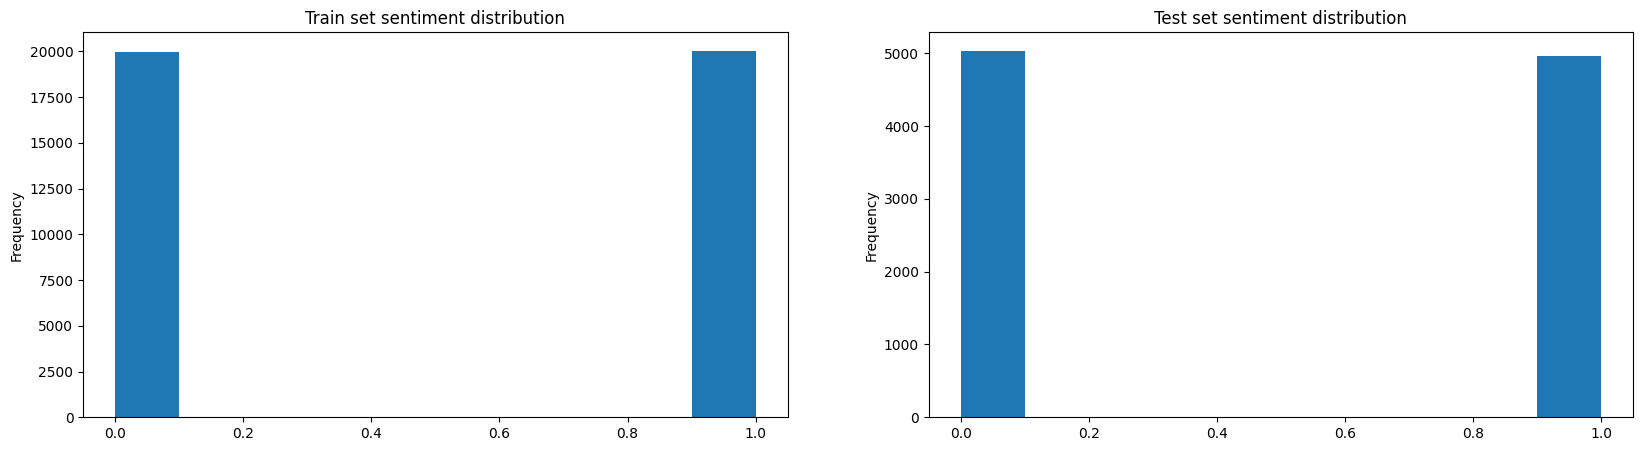

In [15]:
# Check the sentiment distribution of the train and test sets
fig, ax = plt.subplots(1, 2, figsize=(20, 5))
# Plot the sentiment distribution of the train set on the first subplot
df_train.sentiment.plot(kind="hist", title="Train set sentiment distribution", ax=ax[0])
# Plot the sentiment distribution of the test set on the second subplot
df_test.sentiment.plot(kind="hist", title="Test set sentiment distribution", ax=ax[1])
plt.show()

**Tokenization**

To build a model for our task, we need to further preprocess the text by choping it into words or subwords called **tokens**, instead of individual characters.


<div align="center">
  <img src="figures/tokenization.png" width="40%"/>
  <figcaption>Author: Shann Khosla<figcaption/>
</div>

For our task on IMDb dataset, we will use spaces for token boundaries.

<div class="alert alert-block alert-warning">

⚠️⚠️⚠️ It's important to note that using spaces to separate words may not be appropriate for all languages. For instance, Chinese writing doesn't use spaces between words, Vietnamese uses spaces even within words, and German often combines multiple words without spaces. Even in English, spaces are not always the best way to tokenize text, as seen in examples like "hot dog" or "#funnyvideos." ⚠️⚠️⚠️

To address these issues, there are several methods to tokenize and detokenize text at the subword level. We can cite for example Byte Pair Encoding (BPE), Unigram language modeling (ULM), WordPiece and SentencePiece. You can find many state-of-the-art, fast and optimized tokenizes in [the tokenizers library by Hugging Face](https://huggingface.co/docs/tokenizers/index).
</div>

<div class='alert alert-info'>

<b> Exercise 1.3.2 </b>
- Perform a <strong>word-level tokenization</strong> using <code>nltk.tokenize.word_tokenize</code>.
- Analyze the behavior of <code>word_tokenize</code>. Does it simply split text based on spaces, or does it handle text in a more nuanced way? Provide an explanation based on your observations.    

<div/>


In [16]:
from nltk.tokenize import word_tokenize
import nltk

nltk.download("punkt_tab")


# tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text, language="english")
    return tokens


# Init stem dataframe, we keep the copy the cleaned dataframe untouched
df_train_tokenized = deepcopy(df_train)
df_test_tokenized = deepcopy(df_test)

# Apply tokenization
df_train_tokenized.review = df_train_tokenized.review.apply(tokenize_text)
df_test_tokenized.review = df_test_tokenized.review.apply(tokenize_text)

df_train_tokenized.reset_index(inplace=True, drop=True)
df_test_tokenized.reset_index(inplace=True, drop=True)

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mouhcine.mendil\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [17]:
for i in range(len(df_train_tokenized)):
    # show elements that are different df_train_tokenized.review.iloc[i] and df_train.review.iloc[i].split()
    if not df_train_tokenized.review.iloc[i] == df_train.review.iloc[i].split():
        print(df_train_tokenized.review.iloc[i])
        print(df_train.review.iloc[i].split())
        break

['seen', 'movie', 'read', 'book', 'good', 'thing', 'movie', 'parts', 'gets', 'thinking', 'little', 'spiritual', 'subject', 'evolution', 'sincronicity', 'part', 'world', 'however', 'movie', 'immersion', 'easily', 'broken', 'little', 'rapport', 'viewer', 'characters', 'clear', 'book', 'looses', 'lot', 'movie', 'version', 'events', 'suppose', 'show', 'sincronicity', 'taking', 'place', 'almost', 'unrecognizable', 'lot', 'reasoning', 'done', 'viewer', 'see', 'scene', 'indicates', 'coincidence', 'even', 'imagine', 'something', 'greater', 'purpose', 'enlightenment', 'scenes', 'visually', 'poor', 'create', 'better', 'feeling', 'supposed', 'recall', 'enlightenment', 'keanu', 'reeves', 'little', 'buddha', 'well', 'nothing', 'like', 'scenes', 'poorly', 'executed', 'lot', 'scenes', 'really', 'develop', 'story', 'also', 'help', 'creating', 'atmosphere', 'better', 'actors', 'movie', 'namely', 'hector', 'elizondo', 'joaquim', 'de', 'almeida', 'jürgen', 'prochnow', 'can', 'not', 'save', 'first', '2', 

➡️ Among other features, the word_tokenize tokenizer treats certain combinations, such as cannot, as two separate tokens (can and not). This behavior contributes to a slight difference in output, even when the text has been carefully cleaned. Such differences arise because word_tokenize applies linguistic rules, distinguishing it from a straightforward text splitter that only separates based on spaces.

-----

Here's a quick overview of some important NLP terminology:

- **Document**: a single sample text in the dataset (e.g., a single movie review).

- **Corpus**:  a large collection of documents (reviews) in the dataset.

- **Vocabulary**:  The complete set of unique tokens for the training corpus. The vocabulary is a subset of the words used for training that might exist in the broader corpus, and should therefore be comprehensive to avoid encountering a word not in its vocabulary (i.e.,  Out-of-Vocabulary words). 

<div class="alert alert-block alert-warning">
⚠️ Usually, limitation are applied to the vocabulary size which typically involves selecting the most frequent tokens, since it’s unlikely that very rare words will be important for the task. Limiting the vocabulary size will reduce the number of parameters the model needs to learn. 

In real-world scenarios, we cannot precisely predict the tokens we will encounter during operation. Therefore, to avoid bias, you should construct the vocabulary (and corpus) based solely on your **training set**.
</div>

<div class='alert alert-info'>
<b> Exercise 1.3.3 </b>

* Recover all the tokens of the training corpus in a list. We recommand using [`pandas.DataFrame.explode`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).
* Count the number of the unique tokens that can constitute the full vocabulary. 
* Reduce the vocabulary to the 10000 most frequent tokens 
* Store the result in a dictionnary `vocab_token2index` where each token (key) is associated a unique integer id (for example a unique value between 0 and 9999).
<div/>

<div class='alert alert-info'>
<b> Exercise 1.3.3 </b>

* Recover all the tokens from the training corpus and store them in a list. We recommend using [`pandas.DataFrame.explode`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.explode.html).
* Count the number of unique tokens that constitute the full vocabulary.
* Reduce the vocabulary to the 10,000 most frequent tokens.
* Store the result in a dictionary `vocab_token2index`, where each token (key) is assigned a unique integer ID (for example, a value between 0 and 9999).

</div>


In [18]:
# extract all tokens from df_train_tokenized
training_tokens = df_train_tokenized.review.explode("review")

# Count the number of tokens in the vocabulary
print(f"The number of tokens in the full vocabulary is: {len(set(training_tokens))}")

# Reduce size to the 10000th most frequent
vocabulary = training_tokens.value_counts()[:10000]

# token to index dict
vocab_token2index = {token: idx for idx, token in enumerate(vocabulary.keys())}

# Count the number of tokens in the limited vocabulary
print(f"The number of tokens in the filtered vocabulary is: {len(vocab_token2index)}")

The number of tokens in the full vocabulary is: 92446
The number of tokens in the filtered vocabulary is: 10000


### Text vectorization

Text Vectorization consists of converting textual data into numerical representations. This makes it possible to process textual data in machine learning algorithms that typically work with numerical values. Common vectorization techniques include:

* **One-Hot Encoding (OHE)**: represents a token as a binary vector that has the size of the vocabulary. Each token is assigned a unique position in the vector, corresponding to its index in the vocabulary. In the relevant position, the vector has $1$ to indicate the token's presence and $0$ otherwise. This approach is simple but turns out to be inefficient for large vocabularies. For instance, if there are 50,000 tokens in the vocabulary, one-hot encoding would create a 50,000-dimensional **sparse** vector (which mostly contains zeros) per token. If we need a encoding at the document level, a strategy needs to be adopted to aggregate the one-hot representations of the tokens composing the documents.  

* **Bag-of-Words (BoW)**: represents text data as a numerical vector, where each unique word in the vocabulary corresponds to a dimension in the vector space. Unlike one-hot encoding, which uses binary values to indicate the presence of a single token, BoW counts the occurrences of each token in a document. This representation summarizes the document's content while ignoring token order, context, and semantics.

* **Term Frequency- Inverse Document Frequency (TF-IDF)**:is a numerical statistic used to evaluate the importance of a token (word or term) in a document relative to a collection of documents (corpus). It scores a token by multiplying its Term Frequency (TF) by its Inverse Document Frequency (IDF):
    * Term Frequency (TF): The frequency of a token $t$ in a document $d$, normalized by the total number of tokens in the document $d$:
    $$TF(t, d)= \frac{\text{Number of times the token $t$ appears in the document $d$}}{\text{Total number of tokens in document $d$}}$$
    * Inverse Document Frequency (IDF): A measure of how unique or rare a token $t$ is across the corpus. Tokens that appear in fewer documents (e.g., technical terms) are assigned higher importance than those common in all documents (e.g., stop words like "a," "the").
    $$IDF(t)= \log(\frac{\text{Number of documents in the corpus}}{\text{Number of documents in the corpus containing the token $t$}})$$
    * The TF-IDF The TF-IDF score of a token $t$ in a document $d$ is the product of its TF and IDF values:
    $$TF\text{-}IDF(t, d) = TF(t, d) \cdot IDF(t)$$

* **Embeddings**: An embedding is a numerical representation of complex data, where each token (e.g., word or phrase) is represented as a vector in an $n$-dimensional space. Unlike traditional vectorization techniques like Bag-of-Words or TF-IDF, embeddings are typically compact, dense, and highly informative representations. One of the main advantages of embeddings is their ability to encode semantic relationships. This means that words with similar meanings (synonyms) are represented by vectors that are closer together in the $n$-dimensional space. There are many technique to efficiently learn embeddings in an unsupervised way, some of the most popular **word embedding models** are Word2vec, GloVe, fastText, ELMo and BERT. **You can find online already pretrained models for these popular embeddings**.  
<div align="center">
<img src="figures/taxonomy.png"/>
<div/>

#### Traditional Encoders

Let's first explore traditional encoding techniques on our data, including BoW and TF-IDF. Keep in mind that we can flexibly choose the encoding technique that goes with our classification models (remember, our goal is to perform sentiment analysis on IMDb reviews).  

In the next section, we will spend some time on embedding to understand and visualize how they process the data.

</div>
<div class='alert alert-info'>
<b> Exercise 1.3.4 </b>

* Implement the **Bag-of-Words (BoW) vectorizer** using the [CountVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) from scikit-learn.
* Apply the BoW vectorization on the training data.
* Verify that the first reviews in the training set have been correctly vectorized. How can you confirm this?  
</div>


In [19]:
from sklearn.feature_extraction.text import CountVectorizer

bow_encoder = CountVectorizer(
    vocabulary=vocab_token2index, tokenizer=lambda x: x, preprocessor=lambda x: x
)
X_train_bow = bow_encoder.fit_transform(df_train_tokenized.review)
y_train = df_train_tokenized.sentiment

C:\Users\mouhcine.mendil\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_extraction\text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [20]:
# Verify the vectorized data
# --------------------------

review_index = 0

# get the review
selected_review = df_train_tokenized.review.iloc[review_index]
printmd("### Review")
print(" ".join(selected_review))

# Get vectorized review
vectorized_review = X_train_bow[review_index].toarray().flatten()

# Compared the number of tokens in reviewn and in the vectorized version
printmd("### Number of tokens in the review and in the vectorized version")
print(f"Number of tokens in the review: {len(selected_review)}")
print(f"Number of tokens in the vectorized review: {vectorized_review.sum()}")

# check if the tokens are the same
printmd("### Check if the tokens are the same")
filtered_vocab = [
    token for token, idx in vocab_token2index.items() if vectorized_review[idx] > 0
]
set(filtered_vocab) == set(selected_review)

### Review

redeeming quality movie otherwise insults viewer intelligence losing track time plot reason produced plus guy glasses ever got gig hollywood beyond


### Number of tokens in the review and in the vectorized version

Number of tokens in the review: 21
Number of tokens in the vectorized review: 21


### Check if the tokens are the same

True

</div>
<div class='alert alert-info'>
<b> Exercise 1.3.5 </b>

* Implement the **TF-IDF vectorizer** using the [TfidfVectorizer](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) from scikit-learn.
* Apply the TF-IDF vectorization on the training data.
* Pick some reviews and print their 10 most important tokens based on their TF-IDF scores.  
* Reflect: Can you infer whether the associated sentiment is positive or negative based on the most important tokens?

</div>


In [21]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_encoder = TfidfVectorizer(
    vocabulary=vocab_token2index, tokenizer=lambda x: x, preprocessor=lambda x: x
)
X_train_tfidf = tfidf_encoder.fit_transform(df_train_tokenized.review)
y_train = df_train_tokenized.sentiment

X_train_tfidf_array = X_train_tfidf.toarray()

In [ ]:
vocab_tokens = np.array(list(vocab_token2index.keys()))
sample_ids = [0, 1, 20]
for sample_id in sample_ids:
    args = np.argsort(X_train_tfidf_array[sample_id])[::-1]
    printmd(f"### Top 10 tokens for the sample {sample_id}")
    print(vocab_tokens[args[:10]])
    sentiment = y_train[sample_id]
    print(f"Sentiment: {'positive' if sentiment == 1 else 'negative'}")

### Top 10 tokens for the sample 0

['gig' 'insults' 'glasses' 'losing' 'intelligence' 'redeeming' 'track'
 'produced' 'plus' 'otherwise']
Sentiment: negative


### Top 10 tokens for the sample 1

['rice' 'chronicles' 'anne' 'insult' 'vampire' 'fans' 'book' 'butchered'
 'compliment' 'associate']
Sentiment: negative


### Top 10 tokens for the sample 20

['absorbing' 'choppy' 'flair' 'penn' 'principal' 'weight' 'stealing'
 'every' 'revealed' 'frame']
Sentiment: positive


## 1.4  Word Embeddings

Let's learn how to use word embedding models and explore some interesting features on specific examples.

</div>
<div class='alert alert-info'>
<b> Exercise 1.4.1 </b>


* Using gensim [downloader](https://radimrehurek.com/gensim/downloader.html), load a pretrained word embedding model. You can find the list of available models [here](https://github.com/piskvorky/gensim-data?tab=readme-ov-file#models) (suggestion: start with `glove-wiki-gigaword-100`).

* Use the word embedding model to vectorize the following tokens: `["man", "woman", "king", "queen", "prince", "princess", "actor", "actress", "movies"]`

* What is the dimension of the embedding space ? 

* Try loading another model and compare the size of the embedding vectors.

<div/>

In [23]:
import gensim.downloader as api

# Embedding model
print("Loading embedding model...")
embedding_model = api.load("glove-wiki-gigaword-100")

Loading embedding model...


In [24]:
words = [
    "man",
    "woman",
    "king",
    "queen",
    "prince",
    "princess",
    "actor",
    "actress",
    "movies",
]

# Get the vectors for the words
word_embeddings = np.array([embedding_model[word] for word in words])
printmd(f"The dimension of the embeddings is: {word_embeddings.shape[-1]}")

The dimension of the embeddings is: 100

Word embeddings often have hundreds (or even thousands) of dimensions that capture the meaning and relationships of words. However, such high-dimensional objects are difficult to visualize directly.

There is a way to visualize these vectors using machine learning techniques for dimensionality reduction such as Principle Component Analysis (PCA). We will project the high-dimensional word embeddings into a 2D space, while preserving the relative distances between similar words. This helps visualize semantic relationships embedded in the original high-dimensional space. 

<div class="alert alert-block alert-warning">

⚠️ BoW and TF-IDF vectorizations can also be visualized using dimensionality reduction. But since they don't capture semantic relationships, the distance between words doesn't necessarily represent their actual similarities in meaning. ⚠️

</div>

</div>
<div class='alert alert-info'>
<b> Exercise 1.4.2 </b>

* Use [PCA](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) to project the embeddings of the previous exercise into a 2D space.
* Visualize the 2D word embeddings using a scatter plot.
* Compute the vector `mystery_embedding=embedding("actor")-embedding("man")+embedding("woman")`. Project it in 2D using PCA and add it to the previous scatter plot.
* Interpret the resulting vector `mystery_embedding` and find its most similar word using [`similar_by_vector`](https://radimrehurek.com/gensim/models/keyedvectors.html#gensim.models.keyedvectors.KeyedVectors.similar_by_vector)?
* Reflect: do arithmetic operations on word embeddings carry semantic meaning?
<div/>

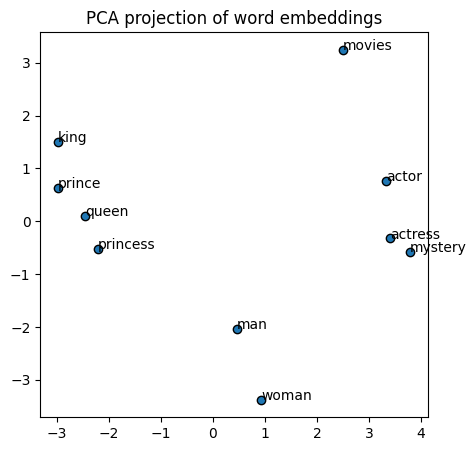

The most similar word to the mystery embedding is: actress

In [25]:
from sklearn.decomposition import PCA

# Init PCA object
pca = PCA(n_components=2)
# fit/project embeddings in 2D
projected_embeddings = pca.fit_transform(word_embeddings)

mystery_embedding = word_embeddings[-3] + word_embeddings[1] - word_embeddings[0]
mystery_embedding_projected = pca.transform(mystery_embedding.reshape(1, -1))

# add mystery embedding to the words
if "mystery" not in words:
    words.append("mystery")
projected_embeddings = np.vstack([projected_embeddings, mystery_embedding_projected])

# Plot the embeddings
plt.figure(figsize=(5, 5))
plt.scatter(projected_embeddings[:, 0], projected_embeddings[:, 1], edgecolor="k")

for i, word in enumerate(words):
    plt.annotate(word, (projected_embeddings[i, 0], projected_embeddings[i, 1]))

plt.title("PCA projection of word embeddings")
plt.show()

# Most similar word to the mystery embedding
most_similar_word = embedding_model.similar_by_vector(mystery_embedding, topn=1)[0][0]
printmd(f"The most similar word to the mystery embedding is: {most_similar_word}")

Now that we’ve explored word-level embeddings, let’s move on to **document embeddings**. Instead of representing individual words, we’ll generate embeddings for entire IMDb reviews using **Doc2Vec**.

</div>
<div class='alert alert-info'>
<b> Exercise 1.4.3 </b>

* Complete the code below to initialize and train [Gensim Doc2Vec](https://radimrehurek.com/gensim/models/doc2vec.html) model. 
* Generate vector embeddings for the training documents.
* What is the size of the embeddings?
<div/>


In [26]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Tag the reviews
tagged_reviews = [
    TaggedDocument(words=review, tags=[idx])
    for idx, review in enumerate(df_train_tokenized.review)
]

# Init Doc2Vec model
print("Init Doc2Vec model...")
doc2vec_encoder = Doc2Vec(vector_size=100, window=5, min_count=1, workers=4, epochs=20)
# Build vocabulary
print("Building vocabulary...")
doc2vec_encoder.build_vocab(tagged_reviews)
# Train the model
print("Training the model...")
doc2vec_encoder.train(
    tagged_reviews,
    total_examples=doc2vec_encoder.corpus_count,
    epochs=doc2vec_encoder.epochs,
)

# Infer vectors for the training set
print("Infer vectors for the training set...")
X_train_doc2vec = np.array(
    [doc2vec_encoder.infer_vector(review) for review in df_train_tokenized.review]
)

Init Doc2Vec model...
Building vocabulary...
Training the model...
Infer vectors for the training set...


#### Summing Up

In this part, we explored various methods to vectorize our documents. Importantly, we ensured that the vocabulary was extracted, and the encoders were trained exclusively on the training data. This is crucial to avoid leaking information from the test set, which could lead to a biased evaluation of model performance.

Let’s refactor the code to create a reusable function that utilizes the pre-fitted vectorizers. This function will be specifically useful later for vectorizing the test data, ensuring consistency in our evaluation process.

In [27]:
def vectorize_data(df_reviews, method):
    """
    Vectorize the data using the specified method
    Args:
        df_reviews: pd.Series, reviews to vectorize
        method: str, method to use for vectorization ("bow", "tfidf" or "doc2vec")
    Returns:
        X: np.array, vectorized data
    """
    if method == "bow":
        X = bow_encoder.transform(df_reviews)
    elif method == "tfidf":
        X = tfidf_encoder.transform(df_reviews)
    elif method == "doc2vec":
        X = np.array([doc2vec_encoder.infer_vector(review) for review in df_reviews])
    else:
        raise ValueError("Unknown method")
    return X

## 1.5 Classification

We have pre-fitted our vectorizers on the training data, it's time to apply them to the test set.

<div class='alert alert-info'>
<b> Exercise 1.5.1 </b>

* Ensure you are using clean tokenized test data before vectorization.
* Vectorize the tokenized test data using the pre-fitted vectorizers for:
  - Bag of Words (BoW)
  - TF-IDF
  - Doc2Vec

* Assign the sentiment labels from the test data to a variable `y_test`.

<div/>

In [28]:
X_test = {}

print("BoW vectorization ...")
X_test["bow"] = vectorize_data(df_test_tokenized.review, "bow")
print("TF-IDF vectorization ...")
X_test["tfidf"] = vectorize_data(df_test_tokenized.review, "tfidf")
print("Doc2Vec vectorization ...")
X_test["doc2vec"] = vectorize_data(df_test_tokenized.review, "doc2vec")

# Get the target
y_test = df_test_tokenized.sentiment

X_train = {
    "bow": X_train_bow,
    "tfidf": X_train_tfidf,
    "doc2vec": X_train_doc2vec,
}

BoW vectorization ...
TF-IDF vectorization ...
Doc2Vec vectorization ...


<div class='alert alert-info'>
<b> Exercise 1.5.2 </b>

- Train two classifier models: **Logistic Regression** and **Random Forest** for each of the following vectorization techniques:
  - Bag of Words (BoW)
  - TF-IDF
  - Doc2Vec

  This results in a total of **six models**. Organize these models in a nested dictionary structure, where:
  - The first level of the dictionary is indexed by the **model name** (e.g., `"logistic_regression"`, `"random_forest"`).
  - The second level is indexed by the **vectorization technique** (e.g., `"bow"`, `"tfidf"`, `"doc2vec"`).

- Evaluate all trained models on the **test data**:
  1. Compute the **accuracy** for each model.
  2. Display the **confusion matrix** for each model to analyze their performance in detail.

<div/>


In [29]:
models = {
    "logistic_regression": {
        "bow": None,
        "tfidf": None,
        "doc2vec": None,
    },
    "random_forest": {
        "bow": None,
        "tfidf": None,
        "doc2vec": None,
    },
}

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

for model_name in ["logistic_regression", "random_forest"]:
    printmd("-------")
    for method in ["bow", "tfidf", "doc2vec"]:
        if model_name == "random_forest":
            models[model_name][method] = RandomForestClassifier(
                n_estimators=200, max_depth=10, random_state=0
            )
        elif model_name == "logistic_regression":

            models[model_name][method] = LogisticRegression()
        else:
            raise ValueError("Unknown model")

        # Fit the model
        models[model_name][method].fit(X_train[method], y_train)
        # Predict the target
        y_pred = models[model_name][method].predict(X_test[method])

        # Print the classification report
        printmd(f"### {model_name} classification report for {method}")
        print(classification_report(y_test, y_pred))

-------

C:\Users\mouhcine.mendil\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


### logistic_regression classification report for bow

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      5035
           1       0.87      0.87      0.87      4965

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000



### logistic_regression classification report for tfidf

              precision    recall  f1-score   support

           0       0.90      0.88      0.89      5035
           1       0.88      0.90      0.89      4965

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



### logistic_regression classification report for doc2vec

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      5035
           1       0.86      0.83      0.84      4965

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



-------

### random_forest classification report for bow

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5035
           1       0.80      0.88      0.84      4965

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



### random_forest classification report for tfidf

              precision    recall  f1-score   support

           0       0.87      0.78      0.82      5035
           1       0.80      0.88      0.84      4965

    accuracy                           0.83     10000
   macro avg       0.84      0.83      0.83     10000
weighted avg       0.84      0.83      0.83     10000



### random_forest classification report for doc2vec

              precision    recall  f1-score   support

           0       0.80      0.81      0.80      5035
           1       0.80      0.79      0.80      4965

    accuracy                           0.80     10000
   macro avg       0.80      0.80      0.80     10000
weighted avg       0.80      0.80      0.80     10000



<div class='alert alert-info'>
<b> Exercise 1.5.3 </b>

* Create a bar chart comparing the **accuracy** of all six models (use distinct colors to differentiate the vectorization techniques).
* Identify the best combination of **classifier** and **vectorization technique** based on the highest accuracy and balanced performance across both classes.
* Reflect: do the results align with your expectations?

<div/>


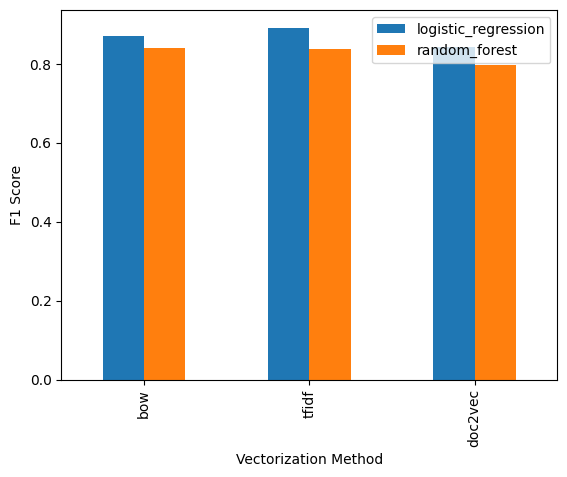

In [31]:
from sklearn.metrics import f1_score

accuracy_scores = {}
f1_scores = {}
for model_name in models:
    accuracy_scores[model_name] = {}
    f1_scores[model_name] = {}
    for method in models[model_name]:
        y_pred = models[model_name][method].predict(X_test[method])
        accuracy_scores[model_name][method] = np.mean(y_test == y_pred)
        f1_scores[model_name][method] = f1_score(y_test, y_pred)

accuracy_df = pd.DataFrame(f1_scores)
accuracy_df.plot(kind="bar")
plt.xlabel("Vectorization Method")
plt.ylabel("F1 Score")
plt.show()